In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd "/content/drive/My Drive/EVA4/Notebooks/S10"

/content/drive/My Drive/EVA4/Notebooks/S10


In [3]:
from vision import dataloaders
from vision.utils import Helper
from vision.models.resnet import ResNet18
from vision.imagetransforms import TorchTransforms,  album_transforms
import torch
from torchvision import  transforms
from vision.lr_finder import LRFinder

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
helper = Helper()

In [5]:
mean, std = helper.get_mean_and_std('cifar10')

Files already downloaded and verified


In [0]:
test_transforms = [ transforms.ToTensor(),
                    transforms.Normalize(mean, std)
                  ]

In [0]:
torch_transforms = TorchTransforms(test_transforms)

In [8]:
aub = album_transforms()

Files already downloaded and verified


In [0]:
train_transforms = aub
test_transforms = torch_transforms.testTransform()
loader = dataloaders.Loader(train_transforms, test_transforms, 'cifar10')

In [10]:
train_dataloader  = loader.dataloader_train()
test_dataloader = loader.dataloader_test()

Files already downloaded and verified
Files already downloaded and verified


In [0]:
Net = ResNet18()

In [12]:
size =  (3, 32, 32)
helper.model_summary(Net, size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [13]:
import torch.optim as optim
import torch.nn as nn
from vision.train_test_model import RunModel
from torch.optim.lr_scheduler import OneCycleLR


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=0.00001, momentum=0.9)
lr_finder = LRFinder(Net, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, val_loader=test_dataloader, end_lr=1, num_iter=600 ,step_mode="exp")


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


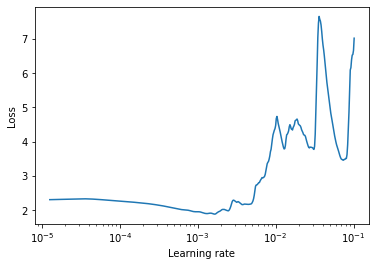

In [14]:
lr_finder.plot()

In [0]:
Best_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]

In [0]:
lr_finder.reset()

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=Best_lr,momentum=0.9 )#,weight_decay = 0.0005)
scheduler = ReduceLROnPlateau(optimizer, patience = 3,min_lr=1e-4)

In [26]:
run = RunModel(Net, train_dataloader, test_dataloader, criterion, optimizer, scheduler, epochs)
run.train_test()

Epoch: 1  Loss=2.3090999126434326  Batch_id=1562  Train Accuracy=10.20: 100%|██████████| 1563/1563 [00:51<00:00, 30.47it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 11.63 % 



Epoch: 2  Loss=2.317258834838867  Batch_id=1562  Train Accuracy=13.13: 100%|██████████| 1563/1563 [00:51<00:00, 30.52it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 13.98 % 



Epoch: 3  Loss=2.293517827987671  Batch_id=1562  Train Accuracy=14.89: 100%|██████████| 1563/1563 [00:50<00:00, 31.20it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 16.30 % 



Epoch: 4  Loss=2.3047492504119873  Batch_id=1562  Train Accuracy=18.39: 100%|██████████| 1563/1563 [00:49<00:00, 31.46it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 20.54 % 



Epoch: 5  Loss=2.214355945587158  Batch_id=1562  Train Accuracy=21.82: 100%|██████████| 1563/1563 [00:49<00:00, 31.54it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 24.28 % 



Epoch: 6  Loss=2.0836422443389893  Batch_id=1562  Train Accuracy=24.90: 100%|██████████| 1563/1563 [00:50<00:00, 30.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 26.14 % 



Epoch: 7  Loss=2.0973172187805176  Batch_id=1562  Train Accuracy=27.30: 100%|██████████| 1563/1563 [00:49<00:00, 31.30it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 28.24 % 



Epoch: 8  Loss=2.096081256866455  Batch_id=1562  Train Accuracy=30.16: 100%|██████████| 1563/1563 [00:50<00:00, 30.72it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 30.95 % 



Epoch: 9  Loss=2.216341018676758  Batch_id=1562  Train Accuracy=32.76: 100%|██████████| 1563/1563 [00:50<00:00, 31.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 33.76 % 



Epoch: 10  Loss=2.101166009902954  Batch_id=1562  Train Accuracy=34.76: 100%|██████████| 1563/1563 [00:50<00:00, 30.86it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 34.72 % 



Epoch: 11  Loss=2.125335693359375  Batch_id=1562  Train Accuracy=35.98: 100%|██████████| 1563/1563 [00:50<00:00, 31.05it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 35.62 % 



Epoch: 12  Loss=2.057025194168091  Batch_id=1562  Train Accuracy=37.19: 100%|██████████| 1563/1563 [00:50<00:00, 30.84it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 36.91 % 



Epoch: 13  Loss=2.0028769969940186  Batch_id=1562  Train Accuracy=38.46: 100%|██████████| 1563/1563 [00:51<00:00, 30.28it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 38.18 % 



Epoch: 14  Loss=1.921642541885376  Batch_id=1562  Train Accuracy=39.58: 100%|██████████| 1563/1563 [00:51<00:00, 30.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 40.08 % 



Epoch: 15  Loss=1.9970871210098267  Batch_id=1562  Train Accuracy=40.98: 100%|██████████| 1563/1563 [00:50<00:00, 30.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 42.09 % 



Epoch: 16  Loss=1.9377555847167969  Batch_id=1562  Train Accuracy=42.30: 100%|██████████| 1563/1563 [00:50<00:00, 31.08it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 43.33 % 



Epoch: 17  Loss=1.93901789188385  Batch_id=1562  Train Accuracy=43.45: 100%|██████████| 1563/1563 [00:50<00:00, 30.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 44.65 % 



Epoch: 18  Loss=2.0082309246063232  Batch_id=1562  Train Accuracy=44.42: 100%|██████████| 1563/1563 [00:51<00:00, 30.50it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 46.03 % 



Epoch: 19  Loss=1.9735444784164429  Batch_id=1562  Train Accuracy=45.21: 100%|██████████| 1563/1563 [00:49<00:00, 31.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 47.05 % 



Epoch: 20  Loss=1.998671054840088  Batch_id=1562  Train Accuracy=46.10: 100%|██████████| 1563/1563 [00:50<00:00, 31.26it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 47.97 % 



Epoch: 21  Loss=2.026759386062622  Batch_id=1562  Train Accuracy=47.01: 100%|██████████| 1563/1563 [00:49<00:00, 31.32it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 48.82 % 



Epoch: 22  Loss=2.0605170726776123  Batch_id=1562  Train Accuracy=47.78: 100%|██████████| 1563/1563 [00:49<00:00, 31.51it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 49.49 % 



Epoch: 23  Loss=2.012179374694824  Batch_id=1562  Train Accuracy=48.58: 100%|██████████| 1563/1563 [00:49<00:00, 31.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 50.17 % 



Epoch: 24  Loss=1.8876020908355713  Batch_id=1562  Train Accuracy=49.37: 100%|██████████| 1563/1563 [00:50<00:00, 30.80it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 51.48 % 



Epoch: 25  Loss=1.755298137664795  Batch_id=1562  Train Accuracy=50.25: 100%|██████████| 1563/1563 [00:51<00:00, 30.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 51.98 % 



Epoch: 26  Loss=1.8411893844604492  Batch_id=1562  Train Accuracy=50.82: 100%|██████████| 1563/1563 [00:50<00:00, 30.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 52.55 % 



Epoch: 27  Loss=1.8045833110809326  Batch_id=1562  Train Accuracy=51.83: 100%|██████████| 1563/1563 [00:49<00:00, 31.29it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 53.37 % 



Epoch: 28  Loss=1.733809232711792  Batch_id=1562  Train Accuracy=52.75: 100%|██████████| 1563/1563 [00:50<00:00, 31.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 54.37 % 



Epoch: 29  Loss=1.660253882408142  Batch_id=1562  Train Accuracy=53.40: 100%|██████████| 1563/1563 [00:50<00:00, 30.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 55.09 % 



Epoch: 30  Loss=1.6317869424819946  Batch_id=1562  Train Accuracy=54.28: 100%|██████████| 1563/1563 [00:49<00:00, 31.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 55.89 % 



Epoch: 31  Loss=1.7054139375686646  Batch_id=1562  Train Accuracy=55.14: 100%|██████████| 1563/1563 [00:49<00:00, 31.29it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 57.33 % 



Epoch: 32  Loss=1.708740472793579  Batch_id=1562  Train Accuracy=55.92: 100%|██████████| 1563/1563 [00:50<00:00, 31.13it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 58.48 % 



Epoch: 33  Loss=1.6170209646224976  Batch_id=1562  Train Accuracy=56.62: 100%|██████████| 1563/1563 [00:50<00:00, 30.71it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 58.59 % 



Epoch: 34  Loss=1.712498426437378  Batch_id=1562  Train Accuracy=57.21: 100%|██████████| 1563/1563 [00:51<00:00, 30.12it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 59.73 % 



Epoch: 35  Loss=1.580790638923645  Batch_id=1562  Train Accuracy=58.47: 100%|██████████| 1563/1563 [00:50<00:00, 31.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 60.56 % 



Epoch: 36  Loss=1.5566916465759277  Batch_id=1562  Train Accuracy=58.97: 100%|██████████| 1563/1563 [00:51<00:00, 30.42it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 61.38 % 



Epoch: 37  Loss=1.497831106185913  Batch_id=1562  Train Accuracy=59.54: 100%|██████████| 1563/1563 [00:51<00:00, 30.11it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 62.00 % 



Epoch: 38  Loss=1.646222472190857  Batch_id=1562  Train Accuracy=60.53: 100%|██████████| 1563/1563 [00:52<00:00, 30.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 62.82 % 



Epoch: 39  Loss=1.5935159921646118  Batch_id=1562  Train Accuracy=61.08: 100%|██████████| 1563/1563 [00:51<00:00, 30.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 62.96 % 



Epoch: 40  Loss=1.456067681312561  Batch_id=1562  Train Accuracy=61.70: 100%|██████████| 1563/1563 [00:51<00:00, 30.10it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 63.36 % 



Epoch: 41  Loss=1.4732766151428223  Batch_id=1562  Train Accuracy=62.54: 100%|██████████| 1563/1563 [00:51<00:00, 30.28it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 64.29 % 



Epoch: 42  Loss=1.5215187072753906  Batch_id=1562  Train Accuracy=63.10: 100%|██████████| 1563/1563 [00:52<00:00, 30.01it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 64.52 % 



Epoch: 43  Loss=1.4042503833770752  Batch_id=1562  Train Accuracy=63.79: 100%|██████████| 1563/1563 [00:51<00:00, 30.06it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 64.57 % 



Epoch: 44  Loss=1.4917268753051758  Batch_id=1562  Train Accuracy=64.49: 100%|██████████| 1563/1563 [00:51<00:00, 30.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 65.88 % 



Epoch: 45  Loss=1.3508764505386353  Batch_id=1562  Train Accuracy=65.30: 100%|██████████| 1563/1563 [00:51<00:00, 30.20it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 66.89 % 



Epoch: 46  Loss=1.3573029041290283  Batch_id=1562  Train Accuracy=65.84: 100%|██████████| 1563/1563 [00:52<00:00, 29.90it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 67.17 % 



Epoch: 47  Loss=1.2624776363372803  Batch_id=1562  Train Accuracy=66.58: 100%|██████████| 1563/1563 [00:53<00:00, 29.46it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 67.51 % 



Epoch: 48  Loss=1.1356476545333862  Batch_id=1562  Train Accuracy=67.18: 100%|██████████| 1563/1563 [00:53<00:00, 29.04it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 67.40 % 



Epoch: 49  Loss=1.1906719207763672  Batch_id=1562  Train Accuracy=67.64: 100%|██████████| 1563/1563 [00:54<00:00, 28.73it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 68.38 % 



Epoch: 50  Loss=1.1353274583816528  Batch_id=1562  Train Accuracy=68.37: 100%|██████████| 1563/1563 [00:54<00:00, 28.80it/s]


Accuracy of the network on the 10000 test images: 68.14 % 



In [0]:
train_accs, test_accs = run.get_accuracies()

In [28]:
len(train_accs), len(test_accs)

(50, 50)

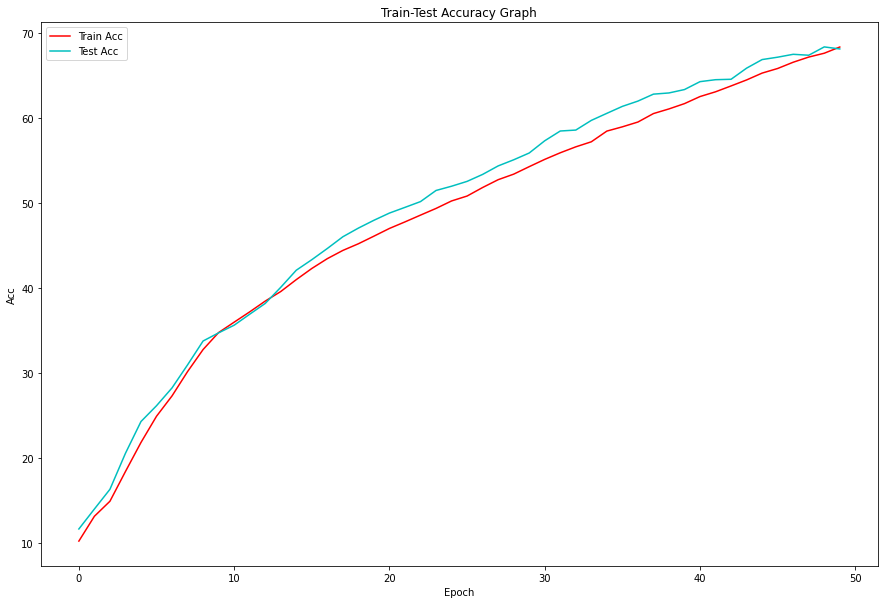

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
epoch_count = range(0, epochs)
plt.figure(1, figsize=[15,10])
plt.plot(epoch_count, train_accs, color='r')
plt.plot(epoch_count, test_accs, color='c')
plt.legend(['Train Acc', 'Test Acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title("Train-Test Accuracy Graph")
plt.show()

In [0]:
dataiter = iter(test_dataloader)
images, labels = dataiter.next()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


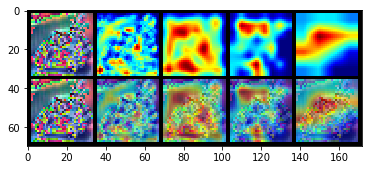

In [31]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

trans = transforms.ToPILImage()
pil_img = trans(torchvision.utils.make_grid(images[6]))
torch_img, norm_torch_img = helper.transform_to_device(pil_img)
helper.plot_images(torch_img, norm_torch_img, Net)